# seaborn

In [1]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 6.2 MB/s eta 0:00:00 MB/s eta 0:00:01


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## seaborn basic

In [4]:
x = np.linspace(0, 14, 100) 
len(x)

100

In [5]:
y1 = np.sin(x)
y2 = 2 + np.sin(x * 0.5)
y3 = 3 + np.sin(x * 1.2)
y4 = 4 + np.sin(x * 1.5)


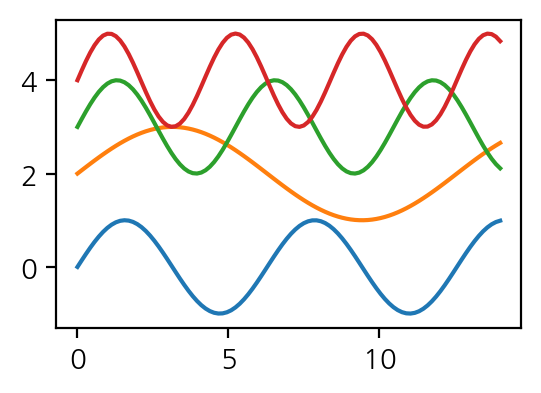

In [8]:
# basic graph

plt.figure(figsize=(3, 2))
plt.plot(x, y1,x, y2, x, y3, x, y4 )


plt.show()

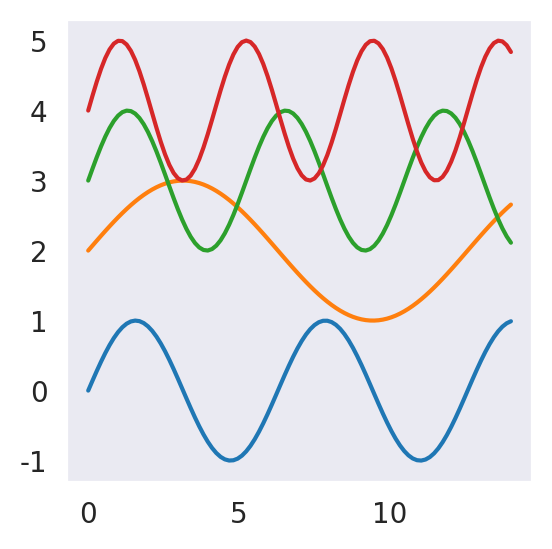

In [14]:
# basic graph
# set_Style에 가능한 옵션
# white, dark, whitegrid, darkgrid

sns.set_style('dark')
fig, ax = plt.subplots(figsize = (3, 3))
ax.plot(x, y1,x, y2, x, y3, x, y4)
plt.show();

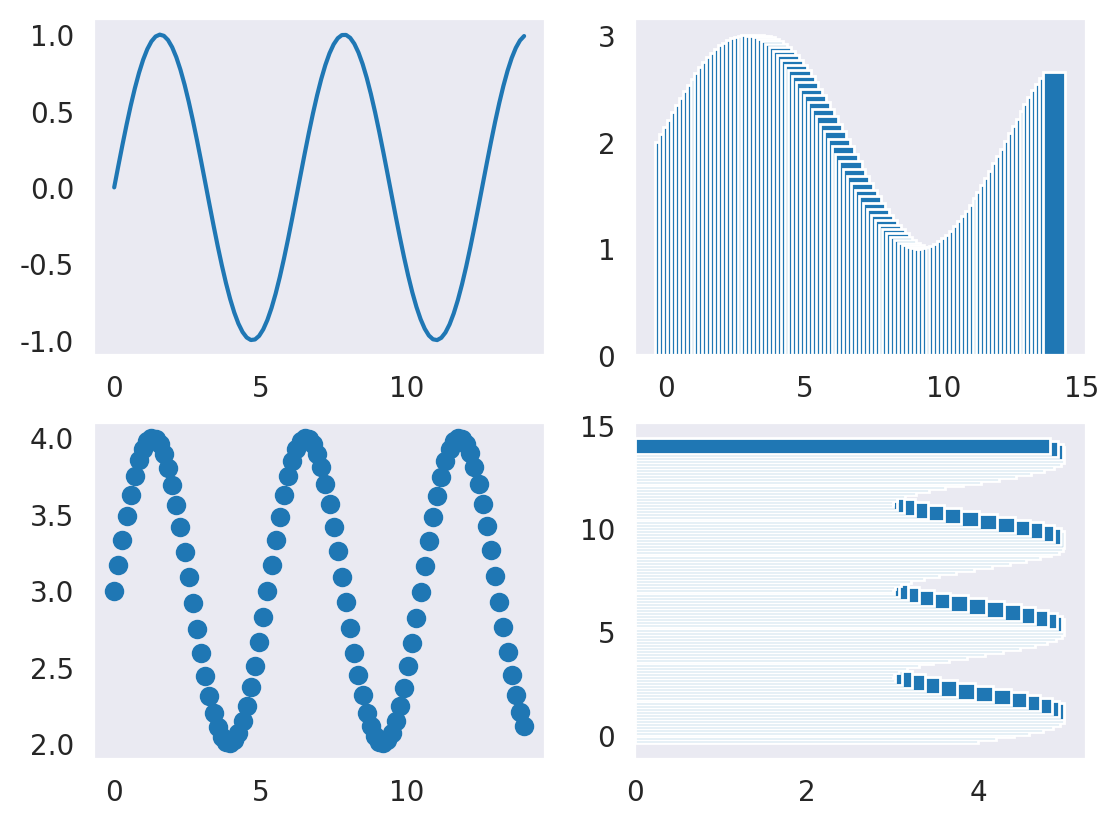

In [19]:
# 그래프 여러개
# [a, b] & [a][b] 형태 둘 다 가능함

fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(x, y1)
ax[0,1].bar(x, y2)
ax[1,0].scatter(x, y3)
ax[1,1].barh(x, y4)

plt.show()

## seaborn heatmap

In [21]:
sns.load_dataset('flights')
flights = sns.load_dataset('flights')

In [28]:
flights.tail() ## nan 값은 없는지 tail로 확인

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


In [29]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [30]:
# 인덱스로 month
# 컬럼은 년도
# 컬럼에 들어가는 데이터는 승객 수

In [37]:
flights_pivot = pd.pivot_table(
    data=flights, 
    index='month', 
    columns='year',
    values='passengers'
    ) 

In [36]:
## 데이터에 연산이 필요없을 때 사용
## 연산이 필요하다면 pivot table 사용해야함, pivot table이많이 쓰인다
pd.pivot(data=flights, index='month', columns='year', values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


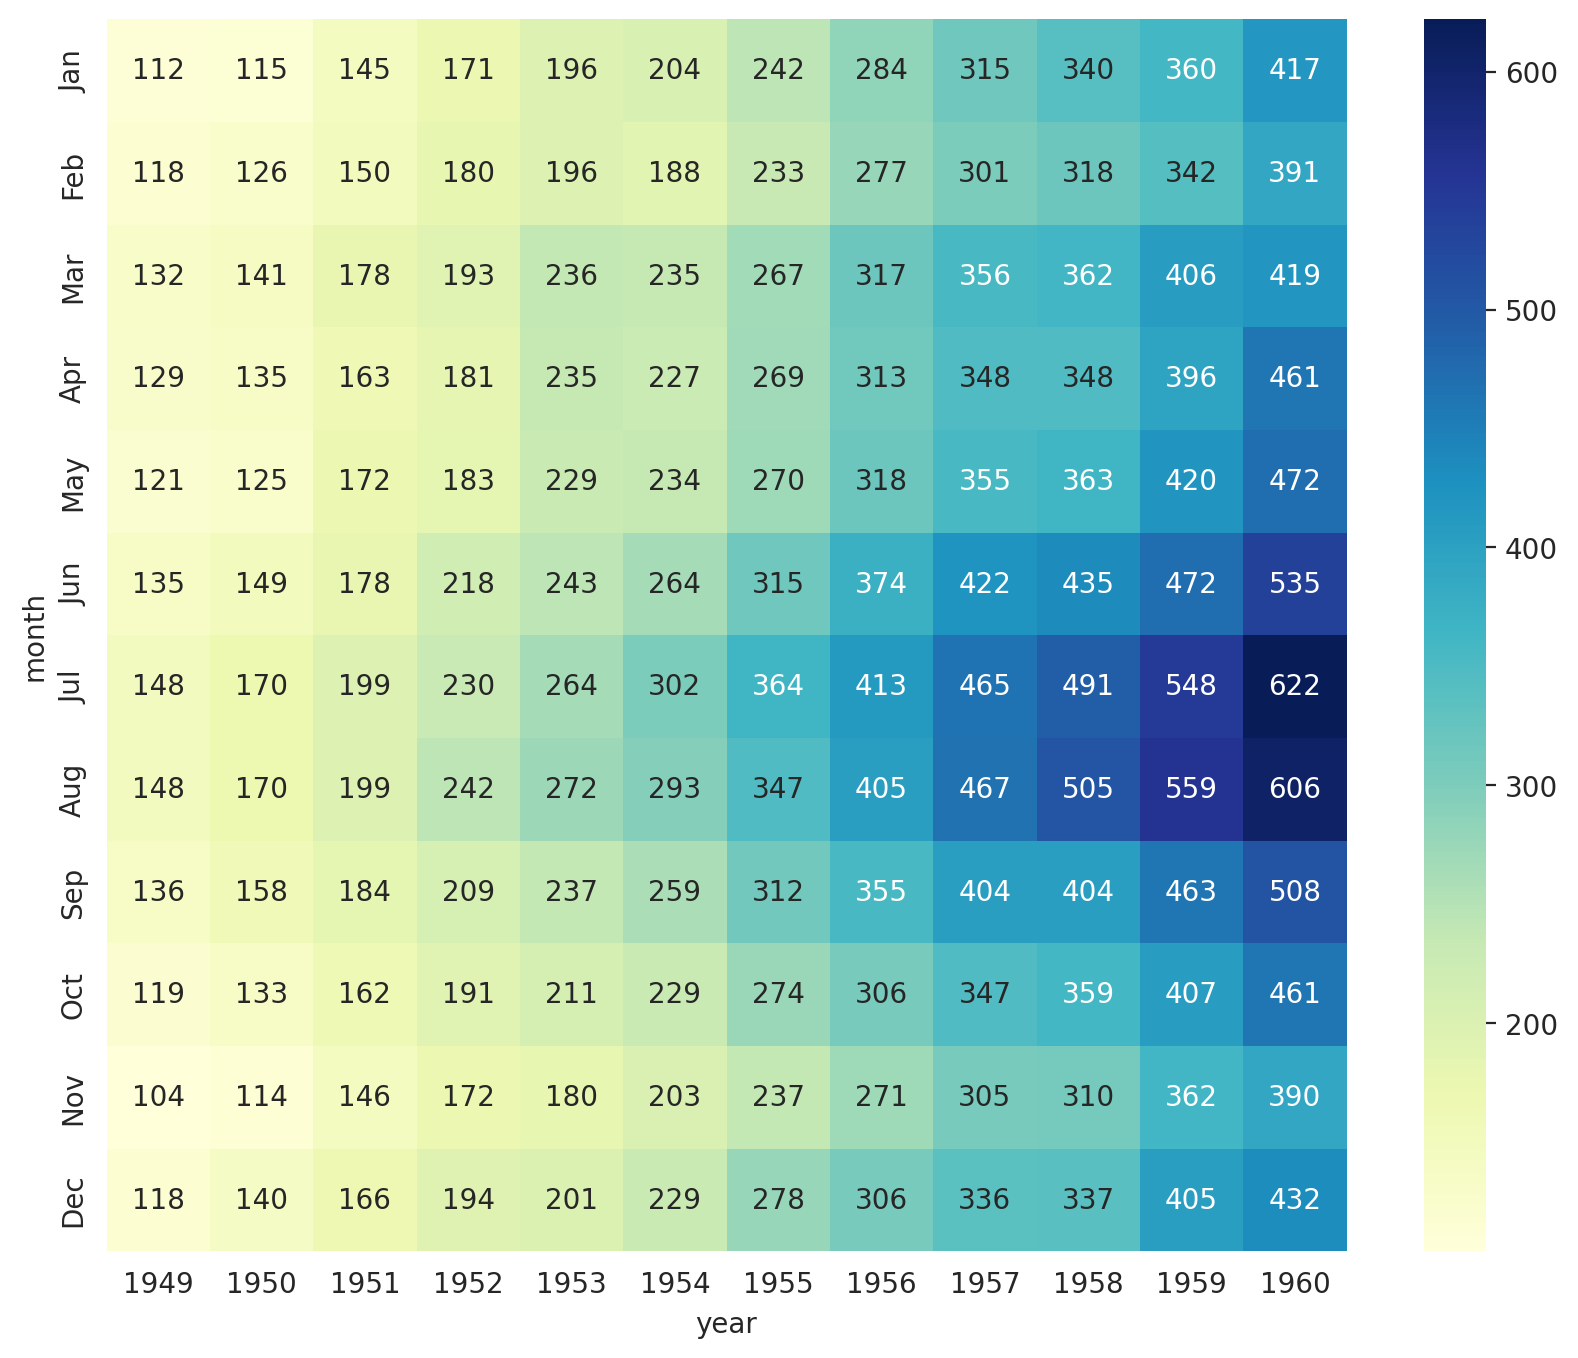

In [41]:
## 전체적인 경향을 파악하기 위해 히트맵 사용
fig, ax = plt.subplots(figsize=(10, 8))
# fmt ='d 는 정수값으로 표현
# annot 옵션은 값을 보여줌
# cmap은 컬러 명령어
sns.heatmap(data= flights_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [42]:
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


## seaborn boxplot

In [43]:
tips = sns.load_dataset('tips')

In [44]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


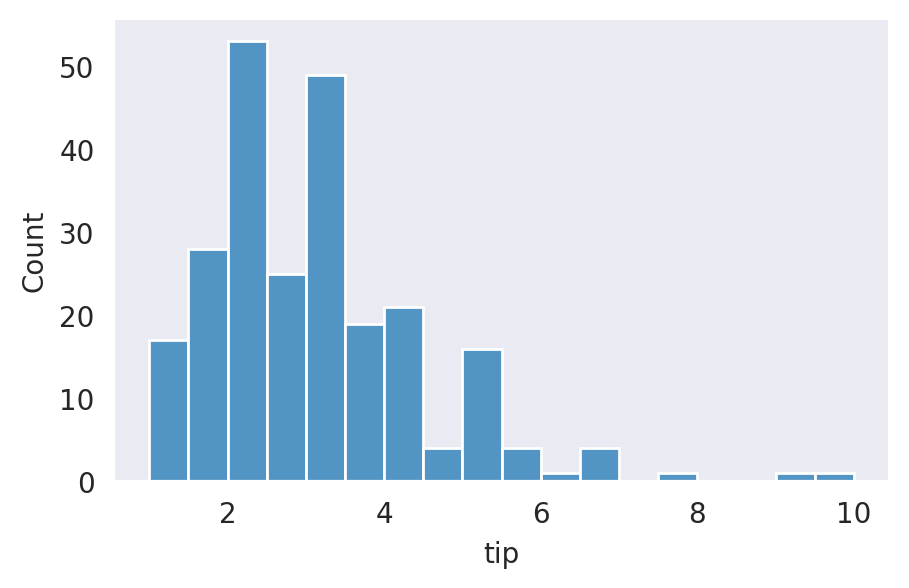

In [49]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot(x= tips['tip'])
plt.show();

## boxplot

- boxplot은 데이터의 분포 이상치를 시각하기 위해서 사용
- 상자형태의 그래프가 그려집니다
    - 25% 제 1사분위수(Q1)
    - 75% 제 3분위수(Q3)
    - 50% 중앙값(Q2)
    - 최댓값, 최솟값
    - upper fence, lower fence
    - 이상치

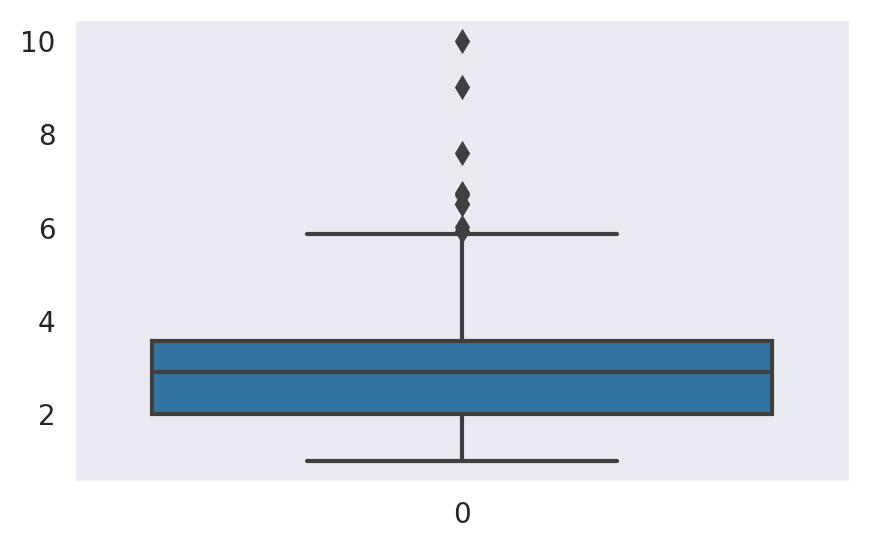

In [50]:
fid, ax = plt.subplots(figsize=(5, 3))
sns.boxplot(tips['tip'])
plt.show()

## 박스는 내가 가진 데이터의 50%를 나타냄
## 박스 위 선은 75%
## 박스 아래 선은 25%
## 박스 중간 선은 내가 가진 데이터의 정 중앙

## 다이아몬드 표시는 이상치로 인식함 >> 정상데이터가 아닌것들
## 

In [51]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


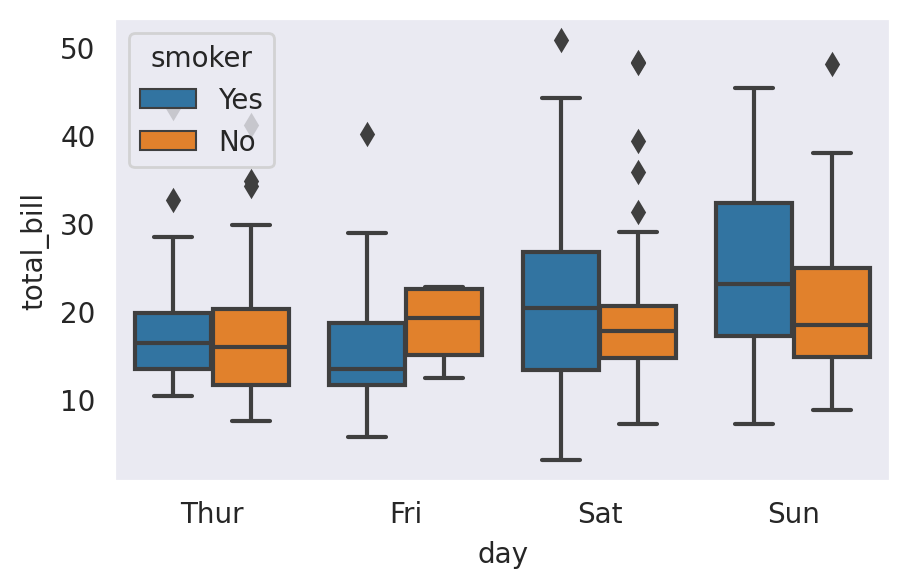

In [54]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.boxplot(x=tips['day'], y=tips['total_bill'], hue=tips['smoker'])
plt.show()